In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

In [2]:
# Import and Initialize Sentimen Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target Search Term
target_terms = ("@BBCNews", "@CBSNews" , "@CNN", "@FoxNews", "@nytimes")

In [5]:
# List to hold results
result_list_scatter = []
result_list_mean = []
csv_list = []

# Loop through all targets
for target in target_terms:

    #List to hold Sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    screen_name_list = []
    date_list = []
    text_list = []
    tweet_number_list = []
    
    
    #Run search around each tweet
    public_tweets = api.search(target, count=100, result_type="recent")
    tweet_number = 101
    #Loop through all tweets

    for tweet in public_tweets["statuses"]:

            # Run Vader analysis on Each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweet_number = tweet_number - 1
            screen_name =tweet["user"]["screen_name"]
            date = tweet["created_at"]
            text = tweet["text"]
            
            # Add each value to appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            screen_name_list.append(screen_name)
            date_list.append(date)
            text_list.append(text)
            tweet_number_list.append(tweet_number)
            
            csv = {
                "User":target,
                "compound":compound,
                "positive":pos,
                "neutral":neu,
                "negative":neg,
                "screen_name":screen_name,
                "date":date,
                "text":text,
                "tweet_id":tweet_number
                }
            
            csv_list.append(csv)

    # Store Sentiments
    sentiment_scatter = {
        "User":target,
        "compound":compound_list,
        "positive":positive_list,
        "neutral":neutral_list,
        "negative":negative_list,
        "screen_name":screen_name_list,
        "date":date_list,
        "text":text_list,
        "tweet_id":tweet_number_list
        }
    
    sentiment_mean = {
        "User":target,
        "compound":np.mean(compound_list),
        "positive":np.mean(positive_list),
        "neutral":np.mean(neutral_list),
        "negative":np.mean(negative_list)
        }

                     
    result_list_scatter.append(sentiment_scatter)    
    result_list_mean.append(sentiment_mean)
    

In [6]:
# Expose Result list using data frame in order to check results
df_tweet = pd.DataFrame(result_list_scatter)

# Create dataset for each user
df_bbc = df_tweet.loc[df_tweet['User']=='@BBCNews']
df_cbs = df_tweet.loc[df_tweet['User']=='@CBSNews']
df_cnn = df_tweet.loc[df_tweet['User']=='@CNN']
df_fox = df_tweet.loc[df_tweet['User']=='@FoxNews']
df_nyt = df_tweet.loc[df_tweet['User']=='@nytimes']


In [7]:
# Set x y variables
bbc_x = list(df_bbc['tweet_id'])[0]
bbc_y = list(df_bbc['compound'])[0]

cbs_x = list(df_cbs['tweet_id'])[0]
cbs_y = list(df_cbs['compound'])[0]

cnn_x = list(df_cnn['tweet_id'])[0]
cnn_y = list(df_cnn['compound'])[0]

fox_x = list(df_fox['tweet_id'])[0]
fox_y = list(df_fox['compound'])[0]

nyt_x = list(df_nyt['tweet_id'])[0]
nyt_y = list(df_nyt['compound'])[0]

<function matplotlib.pyplot.show(*args, **kw)>

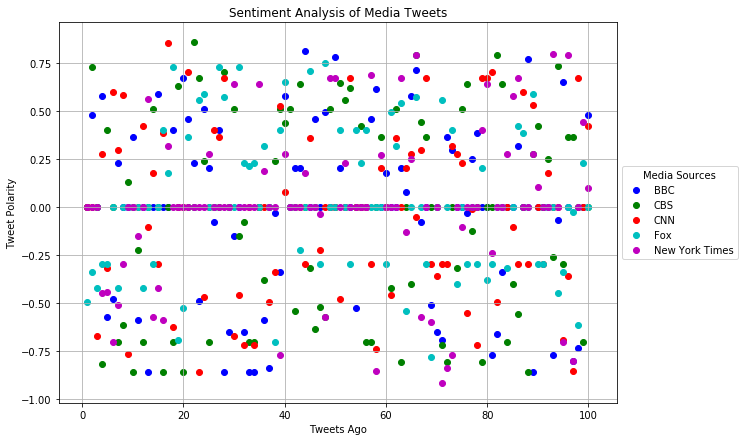

In [8]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size


# plot each user
plt.scatter(bbc_x,bbc_y,label = 'BBC',color = 'b')
plt.scatter(cbs_x,cbs_y,label = 'CBS',color = 'g')
plt.scatter(cnn_x,cnn_y,label = 'CNN',color = 'r')
plt.scatter(fox_x,fox_y,label = 'Fox',color = 'c')
plt.scatter(nyt_x,nyt_y,label = 'New York Times',color = 'm')

plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')
plt.title('Sentiment Analysis of Media Tweets')
plt.legend(loc = 'center left', bbox_to_anchor =(1, 0.5), title='Media Sources')
plt.grid(True)

plt.show
plt.savefig('media_tweets_scatter.png')

In [9]:
df_tweet = pd.DataFrame(result_list_mean)
df_tweet

,User,compound,negative,neutral,positive
0,@BBCNews,-0.012286,0.08819,0.82693,0.08487
1,@CBSNews,-0.033273,0.09921,0.81618,0.08462
2,@CNN,-0.013648,0.07646,0.84587,0.07766
3,@FoxNews,0.028176,0.05028,0.88203,0.06769
4,@nytimes,0.003300,0.06259,0.87667,0.06072


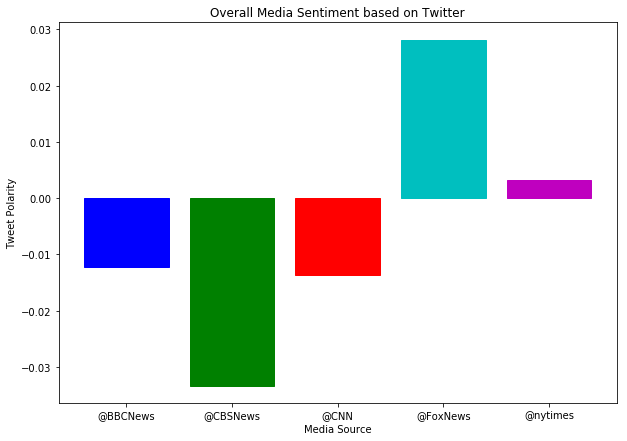

In [10]:
# Set Variables
x = df_tweet['User']
y = df_tweet['compound']

# Create Bar Graph
barlist = plt.bar(x,y)

# Color each bar
barlist[0].set_color('b')
barlist[1].set_color('g')
barlist[2].set_color('r')
barlist[3].set_color('c')
barlist[4].set_color('m')

# Add labels
plt.ylabel('Tweet Polarity')
plt.xlabel('Media Source')
plt.title('Overall Media Sentiment based on Twitter')

plt.show()
plt.savefig('media_tweets_scatter.png')

In [12]:
pd.DataFrame(csv_list).to_csv('distinguish_sentiments.csv',index=False)